<a href="https://colab.research.google.com/github/shofydidntsleep/AIML-Hub/blob/main/Final_of_JST_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset ini berisi informasi tentang berbagai atribut dari sekumpulan buah, memberikan wawasan tentang karakteristiknya. Dataset mencakup detail berikut:



* A_id: Identifier unik untuk setiap buah
* Size: Ukuran buah
* Weight: Berat buah
* Sweetness: Tingkat kemanisan buah
* Crunchiness: Tekstur yang menunjukkan tingkat kerenyahan buah
* Juiciness: Tingkat kelembapan atau juiciness buah
* Ripeness: Tahap kematangan buah
* Acidity: Tingkat keasaman buah
* Quality: Kualitas keseluruhan buah


Dataset ini disediakan  oleh sebuah perusahaan agrikultur di Amerika. Data telah diskalakan dan dibersihkan untuk mempermudah penggunaannya.

In [ ]:
import gdown
import pandas as pd

# Masukkan file_id dari link Google Drive publik
file_id = '1D6POQBCSpH9wWSEgIQEdc5T4-qNkMZ_y'
url = f"https://drive.google.com/uc?id={file_id}"

# Unduh file CSV
output = "dataset.csv"
gdown.download(url, output, quiet=False)

# Baca dataset CSV menggunakan pandas
dataset = pd.read_csv(output)

# Menampilkan informasi dataset
print("Dataset berhasil diunduh dan dimuat:")
print(dataset.info())
print(dataset.head())


Downloading...
From: https://drive.google.com/uc?id=1D6POQBCSpH9wWSEgIQEdc5T4-qNkMZ_y
To: /content/dataset.csv
100%|██████████| 388k/388k [00:00<00:00, 95.0MB/s]

Dataset berhasil diunduh dan dimuat:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.

In [ ]:
df = pd.read_csv(output)
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
print(df.shape)
df.dtypes

(4001, 9)


,0
A_id,float64
Size,float64
Weight,float64
Sweetness,float64
Crunchiness,float64
Juiciness,float64
Ripeness,float64
Acidity,object
Quality,object


#Raw Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
# Typecasting acidity from object to float
def convert_acidity(acidity):
    try:
        return -float(acidity.replace('-', '')) if '-' in acidity else float(acidity)
    except ValueError:
        return np.nan


df['Acidity'] = df['Acidity'].apply(convert_acidity)

In [ ]:
df.describe().drop('count').T.style.background_gradient(cmap='gray')

,mean,std,min,25%,50%,75%,max
A_id,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


#Prepro


In [ ]:
# Checking Null Data
df.isnull().sum()

,0
A_id,1
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,1
Quality,1


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Encoding Quality Feature
df['Quality'] = df['Quality'].map({"good":1, "bad":0})

In [ ]:
# Dropping Useless Feature
df.drop(columns=['A_id'], axis=1, inplace=True)

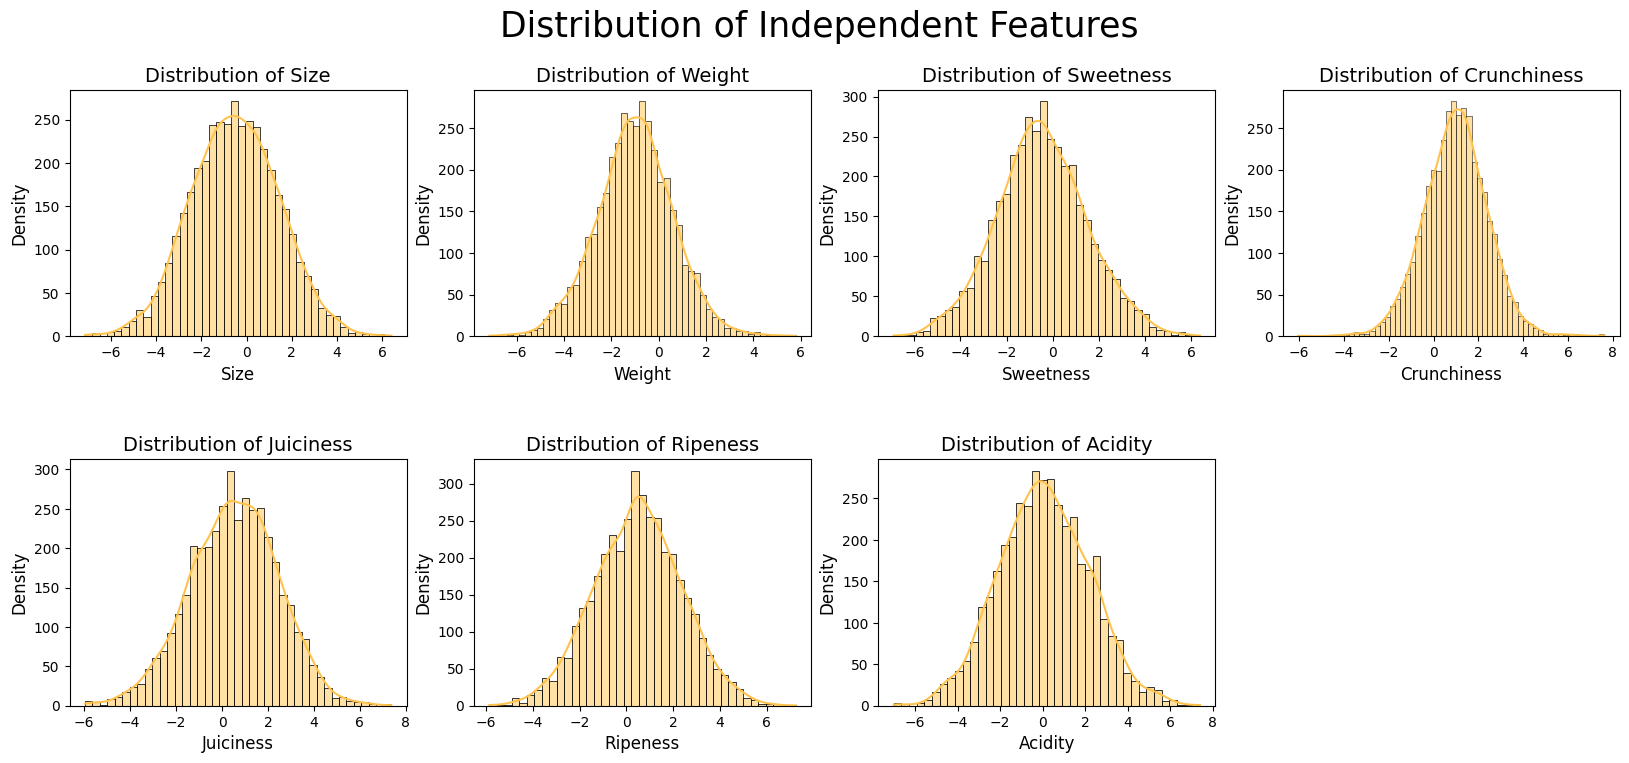

In [ ]:
# Distribution of Independent Features
fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(20,8))
axs = axs.flatten()

features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']  # Replace with actual feature names from your dataset

# Plot KDE for each numerical feature
for i, col in enumerate(features):
    sns.histplot(df[col], ax=axs[i], kde=True, color="#ffc34d")
    axs[i].set_title(f'Distribution of {col}', fontsize=14)
    axs[i].set_xlabel(col, fontsize=12)
    axs[i].set_ylabel('Density', fontsize=12)

plt.suptitle("Distribution of Independent Features", size=25)
plt.subplots_adjust(hspace=0.5)

for j in range(len(features), len(axs)):
    axs[j].set_visible(False)

plt.show()

<ipython-input-35-59da3e987591>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Quality', palette=[colors[4],colors[8]])


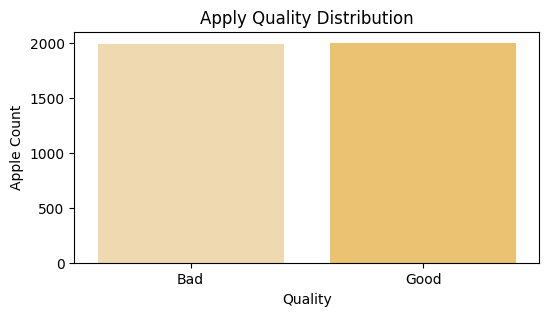

In [ ]:
# Dependent Feature
plt.figure(figsize=(6,3))
colors = sns.light_palette("#ffc34d", n_colors=10)
sns.countplot(data=df, x='Quality', palette=[colors[4],colors[8]])
plt.xticks(ticks=[0,1], labels=['Bad', 'Good'])
plt.ylabel("Apple Count")
plt.title('Apply Quality Distribution')
plt.show()

Dapat dilihat data yang balance

<ipython-input-36-99f62f3bf01b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Quality', y=column, data=df, palette=[colors[4],colors[8]])
<ipython-input-36-99f62f3bf01b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Quality', y=column, data=df, palette=[colors[4],colors[8]])
<ipython-input-36-99f62f3bf01b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Quality', y=column, data=df, palette=[colors[4],colors[8]])
<ipython-input-36-99f62f3bf01b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

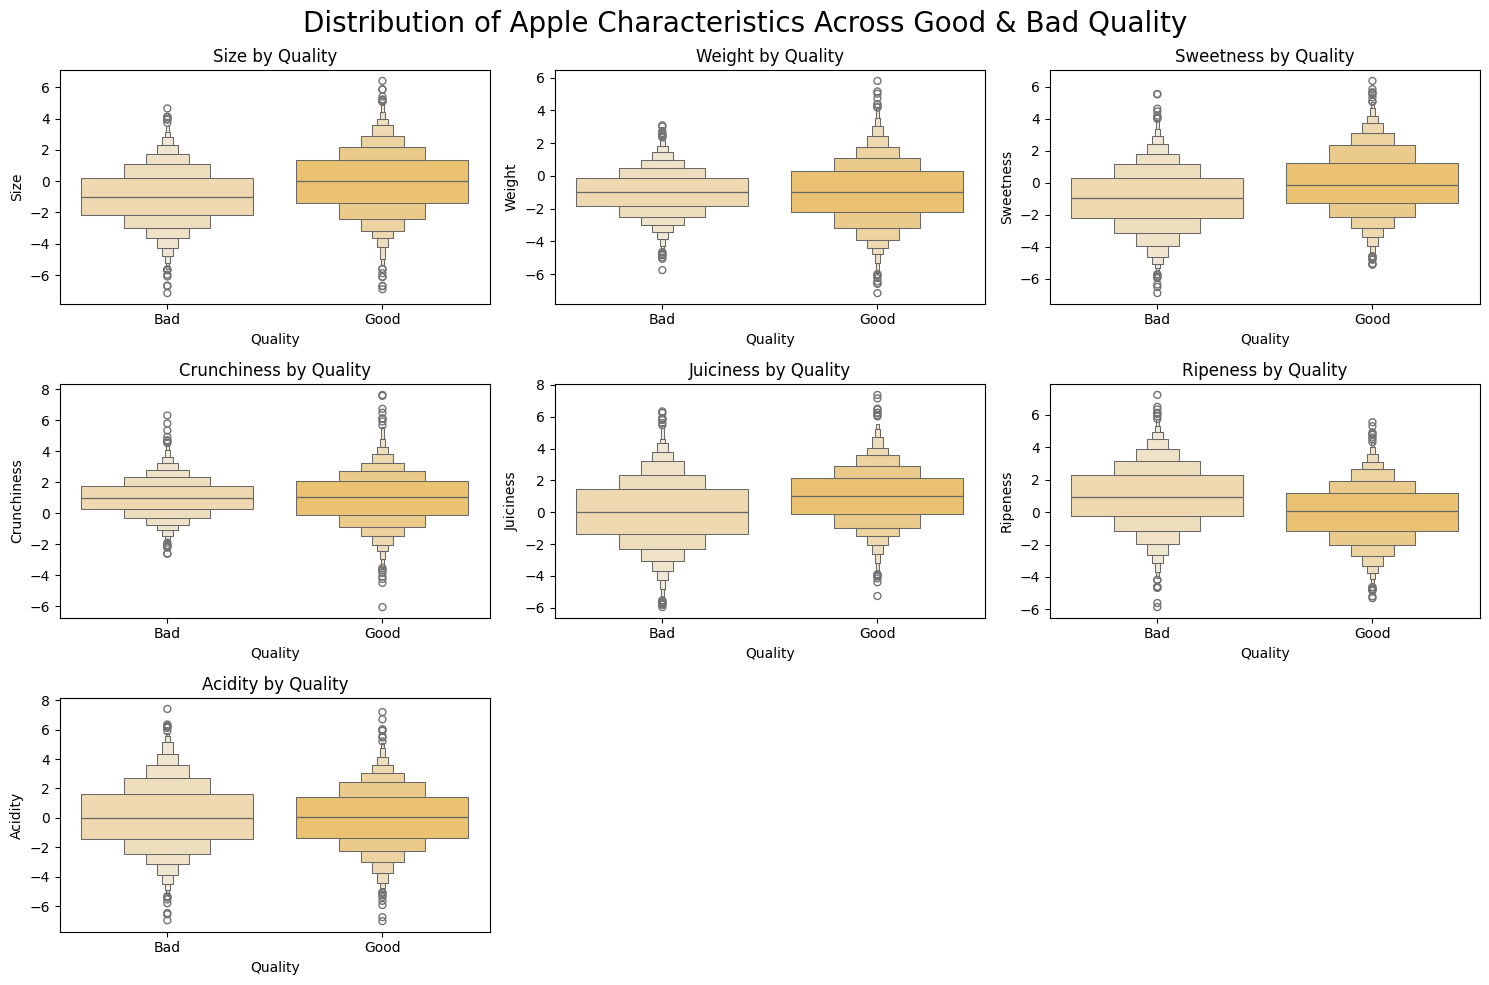

In [ ]:
colors = sns.light_palette("#ffc34d", n_colors=10)

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxenplot(x='Quality', y=column, data=df, palette=[colors[4],colors[8]])
    plt.xticks(ticks=[0,1], labels=['Bad', 'Good'])
    plt.title(f'{column} by Quality')

plt.suptitle("Distribution of Apple Characteristics Across Good & Bad Quality", size=20)
plt.tight_layout()
plt.show()

Apel dengan kualitas buruk memiliki ukuran, tingkat kemanisan, dan kelembapan yang lebih rendah, tetapi memiliki kerenyahan dan tingkat kematangan yang lebih tinggi.

Apel dengan kualitas baik menunjukkan karakteristik yang lebih seimbang, dengan kelembapan yang sedikit lebih baik dan nilai netral pada fitur lainnya, sehingga membuatnya lebih diinginkan secara keseluruhan.

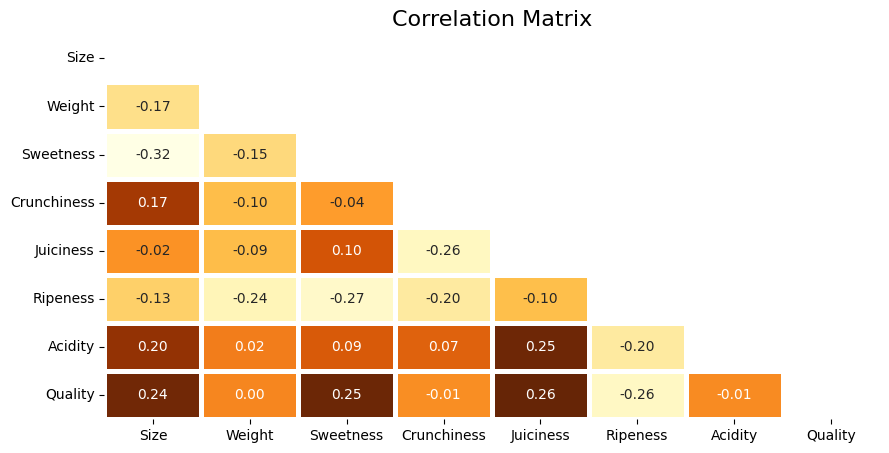

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='YlOrBr', fmt='.2f', linewidths=2.5, cbar=False)
plt.title("Correlation Matrix", size=16)
plt.show()


Influence on Apple Quality:
1. Size, Sweetness, and Juiciness positively correlate with better quality.
2. Ripeness negatively impacts quality.
3. Weight and Crunchiness have no significant effect on quality.

<ipython-input-38-76648d7dd407>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature', y='Value', data=df_melted, palette='Purples')


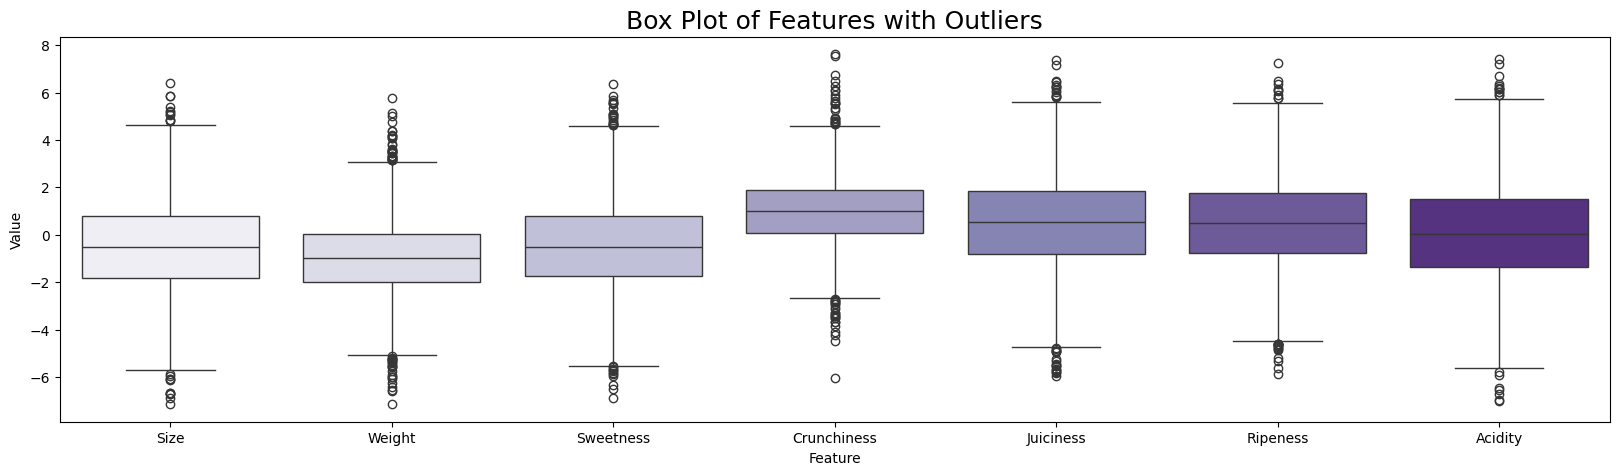

In [ ]:
# Outlier Detection
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
df_melted = df[numerical_features].melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(20, 5))
sns.boxplot(x='Feature', y='Value', data=df_melted, palette='Purples')
plt.title('Box Plot of Features with Outliers', size=18)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

Kita dapat melihat dengan jelas bahwa dataset mengandung sejumlah outlier yang signifikan.

In [ ]:
from sklearn.preprocessing import minmax_scale

In [ ]:
# Splitting Data into dependent & independent feat/ures
x = df.drop(columns=['Quality'], axis=1)
y = df['Quality']



#manual backpro without library

In [ ]:
import numpy as np
def sig(x):
    return 1 / (1 + np.exp(-x))

def sigd(x):
    return sig(x) * (1 - sig(x))

def onehot_enc(lbl, min_val=0):
    mi = min(lbl)
    enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)
    for i, x in enumerate(lbl):
      enc[i, x - mi] = 1
    return enc

def onehot_dec(enc, mi=0):
    return [np.argmax(e) + mi for e in enc]

In [ ]:
import time
def bp_fit(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):
    start_time = time.time()
    np.random.seed(1) # Tetapkan seed untuk reproducibility
    nin = [np.empty(i) for i in layer_conf]  # Inisialisasi neuron input untuk setiap layer
    n = [np.empty(j+1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)] # Inisialisasi output neuron, tambahkan bias untuk semua kecuali layer terakhir
    w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i+1]) for i in range(len(layer_conf) - 1)], dtype=object)  # Inisialisasi bobot secara acak untuk setiap koneksi antar layer
    dw = np.array([np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)], dtype=object) # Inisialisasi perubahan bobot
    d = [np.empty(s) for s in layer_conf[1:]] # Inisialisasi error layer dan input layer
    din = [np.empty(s) for s in layer_conf[1:-1]] # Inisialisasi error layer dan input layer
    epoch = 0   # Inisialisasi epoch dan error
    mse = 1   # Inisialisasi epoch dan error

    mse_list = [] # Simpan MSE setiap epoch
     # Set neuron bias ke 1
    for i in range(0, len(n)-1):
        n[i][-1] = 1
    # Loop pelatihan hingga memenuhi kriteria atau mencapai epoch maksimum
    while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
        epoch += 1
        mse = 0
        # Forward dan backward pass untuk setiap data
        for r in range(len(X)):
            n[0][:-1] = X[r]
             # Forward pass: hitung input dan output setiap layer
            for L in range(1, len(layer_conf)):
                nin[L] = np.dot(n[L-1], w[L-1])
                n[L][:len(nin[L])] = sig(nin[L])
             # Hitung error untuk layer output
            e = target[r] - n[-1]
            mse += sum(e ** 2)
            # Backward pass: hitung gradien error untuk layer output
            d[-1] = e * sigd(nin[-1])
            dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

             # Backward pass untuk layer tersembunyi
            for L in range(len(layer_conf) - 1, 1, -1):
                din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
                d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
                dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))
            # Update bobot menggunakan gradien yang dihitung
            w += dw
        mse /= len(X) # Hitung rata-rata MSE untuk epoch
        mse_list.append(mse)

        if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, MSE: {mse}')

    execution = time.time()- start_time
    print("Waktu eksekusi: %s detik" % execution)

    return w, epoch, mse,mse_list

In [ ]:
def bp_predict(X, w):
    n = [np.empty(len(i)) for i in w]
    nin = [np.empty(len(i[0])) for i in w]
    predict = []
    n.append(np.empty(len(w[-1][0])))
    for x in X:
      n[0][:-1] = x
      for L in range(0, len(w)):
        nin[L] = np.dot(n[L], w[L])
        n[L + 1][:len(nin[L])] = sig(nin[L])
      predict.append(n[-1].copy())
    return predict

Epoch 25, MSE: 0.33759443626424473
Epoch 50, MSE: 0.3006319571250136
Epoch 75, MSE: 0.2771878869138615
Epoch 100, MSE: 0.24103068213007176
Epoch 125, MSE: 0.2190084988259383
Epoch 150, MSE: 0.20582735978711242
Epoch 175, MSE: 0.19977334720254308
Epoch 200, MSE: 0.19655609665675713
Epoch 225, MSE: 0.19423594165448207
Epoch 250, MSE: 0.19231805733676924
Epoch 275, MSE: 0.1906232968058369
Epoch 300, MSE: 0.18900972963339352
Epoch 325, MSE: 0.18735817380660819
Epoch 350, MSE: 0.1855706326351854
Epoch 375, MSE: 0.18349466849849702
Epoch 400, MSE: 0.18091385123430792
Epoch 425, MSE: 0.1779809830913893
Epoch 450, MSE: 0.17544782751138158
Epoch 475, MSE: 0.1734736166992007
Epoch 500, MSE: 0.17183956156385494
Epoch 525, MSE: 0.17042649125053383
Epoch 550, MSE: 0.16915525102334733
Epoch 575, MSE: 0.16795079521095532
Epoch 600, MSE: 0.16676027542608363
Epoch 625, MSE: 0.16556035119938683
Epoch 650, MSE: 0.16435119138462723
Epoch 675, MSE: 0.16314551318722945
Epoch 700, MSE: 0.1619493459333171
Epo

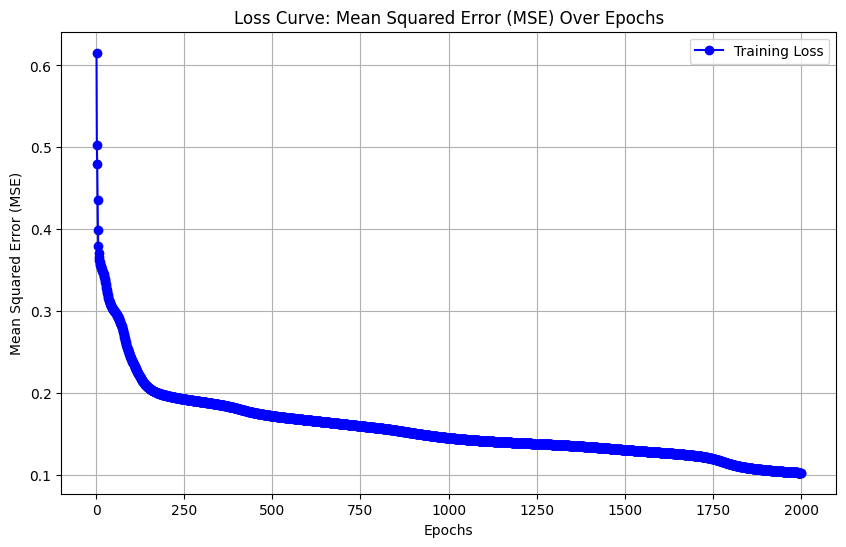

In [ ]:
X = minmax_scale(x)
Y = onehot_enc(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
w, ep,mse, mse_list = bp_fit(X_train, y_train, layer_conf=(7, 10, 2), learn_rate=0.1, max_epoch=2000, print_per_epoch=25)

predict = bp_predict(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Epochs:', ep)
print('MSE ', mse)
print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

# Plot Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, ep + 1), mse_list, label="Training Loss", color="blue", marker="o")
plt.title("Loss Curve: Mean Squared Error (MSE) Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()

Confusion Matrix:
[[460  35]
 [ 46 459]]


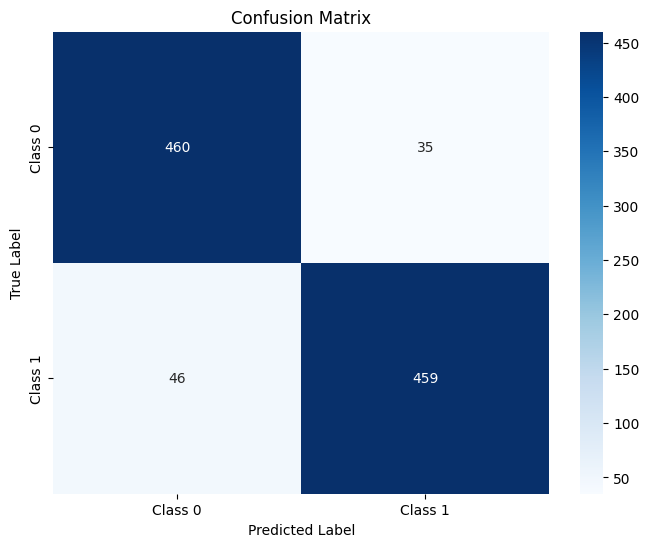


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92       495
     Class 1       0.93      0.91      0.92       505

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



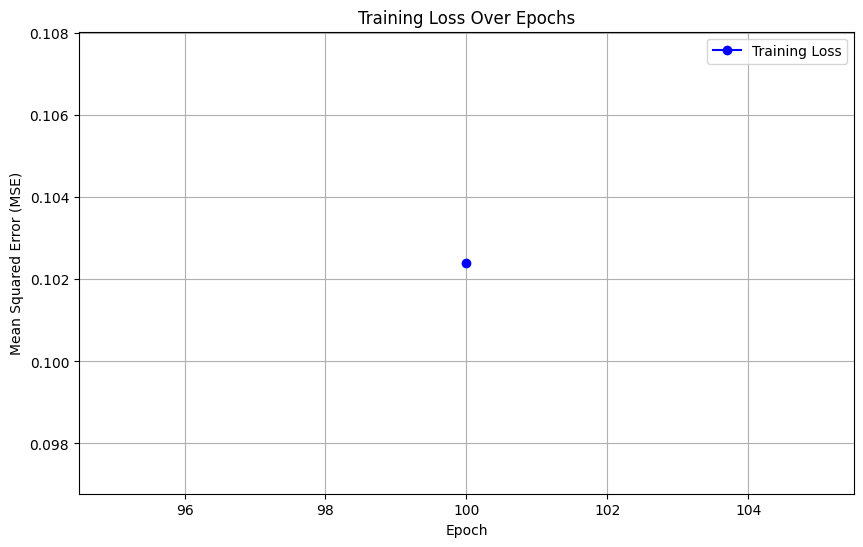

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluasi Confusion Matrix
if len(predict) == len(y_test):
    cm = confusion_matrix(y_test, predict)
    print("Confusion Matrix:")
    print(cm)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Laporan Klasifikasi
    print("\nClassification Report:")
    print(classification_report(y_test, predict, target_names=["Class 0", "Class 1"]))

else:
    print("Jumlah sampel tidak cocok antara prediksi dan target. Tidak dapat membuat Confusion Matrix.")

# Visualisasi Grafik Loss
epochs = 100
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse, label='Training Loss', color='blue', marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid()
plt.show()
